# Image Analysis

In [1]:
import sys
sys.path.append('./_backend/')

import nrrd
import utils
import ioutil

import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path_ct_imagedir = './../../../data_source/raw_images/ct_cropped/' 
path_masksdir = './../../../data_source/raw_images/masks_cropped/'
path_pet_imagedir = './../../../data_source/raw_images/pet_cropped/'

In [3]:
paths_ct_images = ioutil.sample_paths(
    path_ct_imagedir, path_masksdir, target_format='nrrd'
)
paths_pet_images = ioutil.sample_paths(
    path_pet_imagedir, path_masksdir, target_format='nrrd'
)

In [4]:
len(paths_ct_images), len(paths_pet_images)

(198, 198)

## CT 

In [5]:
ct_data = {}
for ct_path in paths_ct_images:
    data, _ = nrrd.read(ct_path['Image'])
    ct_data[ct_path['Patient']] = data

In [17]:
frames = []
for key, img in ct_data.items():
    img_vec = img.ravel()
    labels = np.repeat(key, img_vec.size)
    df = pd.DataFrame([img_vec, labels])
    frames.append(df)
    # columns=['image', 'patient']
df_ct = pd.concat(frames)
df_ct.head()

KeyboardInterrupt: 

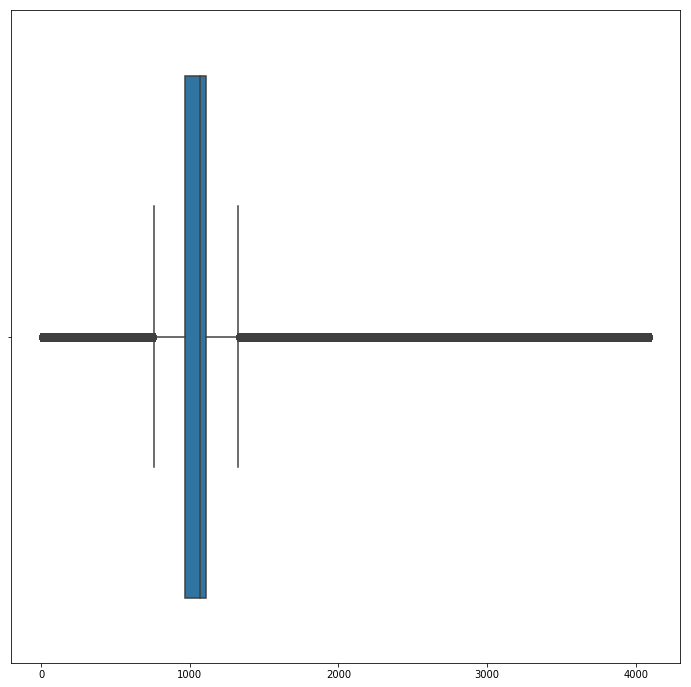

In [12]:
plt.figure(figsize=(12, 12))
# https://python-graph-gallery.com/38-show-number-of-observation-on-boxplot/
sns.boxplot(x=df_ct.columns, data=df_ct)

## PET 

In [8]:
#pet_data = {}
#for pet_path in paths_pet_images:
#    data, _ = nrrd.read(pet_path['Image'])
#    pet_data[pet_path['Patient']] = data